In [5]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [6]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def timeit(func, *args, return_time=False, **kwargs):
    start = time.time()
    ret = func(*args, **kwargs)
    if not return_time:
        print( (time.time()-start))
        return ret
    return time.time()-start, ret
時間=timeit

In [161]:
from utils.timeutils import timeit
import inspect

class Tester:
    logs = None
    def __init__(self, functions, path=None):
        self.functions = []
        for f in functions:
            if type(f) != Binder:
                self.functions.append(Binder(f))
            else:
                self.functions.append(f)

        self.path = path
        self.logs = []
        

    def test(self, *args, loads = None, iters = 10, path = None, 
             save_to_file=False, show_names = None, plot=False, 
             log_results=False, **kwargs):
        
        functions = self.functions
        times = {}
        if show_names == None:
            show_names = [str(x) for x in range(len(loads))]
        for f in functions:
            
            for l, name in zip(loads,show_names, range(len(show_names))):
                
                               
                               
                times = {}              
                times[f"{f.get_name()}_{name}"]= []

            
        for i in range(iters):
            for f in functions:
                for l,name in zip(loads,show_names):
  
                    times[f"{f.get_name()}_{name}"].append(timeit(f, *l[0], **l[1], return_time = True)[0])
        if log_results:
            self.logs.append(times)
            
        if save_to_file:
            if type(save_to_file) == str:
                ...
            else:
                import time
                save_to_file = f"results{str(time.time()).csv}.csv"
            import json
            with open(save_to_file, "w", newline='') as f:
                
                json.dump(times, f)

         if plot:
            import matplotlib.pyplot as plt
                
            
        return times
    
        
    def __call__(self,  *args, save_to_file=False,**kwargs):
        return self.test(*args, save_to_file=save_to_file, **kwargs)
    
class Binder:
    def __init__(self, function, name = None):
        self.function = function
        self.name = name
        
    def get_name(self):
        if self.name is None:
            f = self.function
            return str(inspect.getmodule(f))+"."+f.__qualname__
        return self.name
    
    def __call__(self, *args, **kwargs):
        return self.function(*args, **kwargs)

In [162]:
def timeit(func, *args, return_time=False, **kwargs):
    start = time.time()
    ret = func(*args, **kwargs)
    if not return_time:
        print( (time.time()-start))
        return ret
    return time.time()-start, ret
時間=timeit

In [163]:
path = "titanic3.csv"
df = pd.read_csv(path)
df["sex"] = df["sex"].replace({"female":1,"male":0})

In [164]:
X = df[["pclass","sex","age","fare"]].to_numpy(dtype=int)

y = df["survived"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.15, random_state=42)
NN = NeuralNetwork(np.array((4,6,4,1)),
                   np.array(("relu","relu","sigmoid"),dtype=str),
                   lr =0.001)

timeit(NN.fit,X_train,y_train,epochs = 50)

4.426003456115723


In [165]:
ypreds = np.array([0 if i <0.5 else 1 for i in NN.predict(X_test)[0]])

print(sum(ypreds==y_test)/y_test.shape[0])


0.5380710659898477


In [13]:
NN.fit.__qualname__

'NeuralNetwork.fit'

In [227]:
from utils.timeutils import timeit
import inspect

class Tester:
    logs = None
    def __init__(self, functions, path=None):
        self.functions = []
        for f in functions:
            if type(f) != Binder:
                self.functions.append(Binder(f))
            else:
                self.functions.append(f)

        self.path = path
        self.logs = []
        

    def test(self, *args, loads = None, iters = 10, path = None, 
             save_to_file=False, show_names = None, plot=False, 
             log_results=False, **kwargs):
        
        functions = self.functions
        times = []
        if show_names == None:
            show_names = [str(x) for x in range(len(loads))]
        
        for l, name, it in zip(loads,show_names, range(len(show_names))):
            d = {}
            for f in functions:
                
                  
                d[f"{f.get_name()}_{name}"]= []
     
            times.append(d)
                
        for i in range(iters):
            for f in functions:
                for l, name, it in zip(loads,show_names, range(len(show_names))):
                    times[it][f"{f.get_name()}_{name}"].append(timeit(f, *l[0], **l[1], return_time = True)[0])
        if log_results:
            self.logs.append(times)
            
        if save_to_file:
            if type(save_to_file) == str:
                ...
            else:
                import time
                save_to_file = f"results{str(time.time()).csv}.csv"
            import json
            with open(save_to_file, "w", newline='') as f:
                
                json.dump(times, f)

    
        return times
    
        
    def __call__(self,  *args, save_to_file=False,**kwargs):
        return self.test(*args, save_to_file=save_to_file, **kwargs)
    
    @classmethod
    def plot(self, data, title="chart"):
        
        import json
        import matplotlib.pyplot as plt
        import numpy as np
        if type(data)==str:
            with open(data, "r", newline='') as f:
                data = json.load(f)
                      
        
        grouped = {}
        for d in data:
            for k in d:
                grouped[k.split("_")[0]] = []
            
        for d in data:
            for k,v in d.items():
                grouped[k.split("_")[0]].append(sum(v)/len(v))
            
        for k,v in grouped.items():
            grouped[k] = sorted(v)
        
        
        N = len(list(grouped.values())[0])
        ind = np.arange(N) 
        width = 0.25
        c = 0
        #Bar
        temp = []
        for k,v in grouped.items():
            plt.bar(ind+width*c, v, width, label = k)
            temp.append(v)
            c+=1
        temp = list(map(list, zip(*temp)))
        avgs = []
        for t in temp:
            avgs.append(sum(t)/len(t))
        plt.plot(avgs, color="r")
        plt.title(title+" Bar Comparison with mean trend")
        plt.ylabel("Time(s)")
        plt.xlabel("Load")
        plt.legend()
        plt.show()    
        
        
        for k,v in grouped.items():
            plt.plot(v, label = k)
        plt.title(title+" Comparison and growth")
        plt.ylabel("Time(s)")
        plt.xlabel("Load")
        plt.legend()
        plt.show()    
        
        
        
        for d in data:
            proms = []
            names = []
            for k,v in d.items():
                proms.append((sum(v)/len(v)))
                names.append(k)
            plt.barh(names, proms)
        plt.title(title+" Bars")
        plt.show()
            
    
    
    
class Binder:
    def __init__(self, function, name = None):
        self.function = function
        self.name = name
        
    def get_name(self):
        if self.name is None:
            f = self.function
            return str(inspect.getmodule(f))+"."+f.__qualname__
        return self.name
    
    def __call__(self, *args, **kwargs):
        return self.function(*args, **kwargs)

In [167]:
cnnfit = Binder(NN.fit, "NNfit")
tester = Tester([cnnfit] )


In [210]:

tester(loads = [([X_train, y_train, ],{"epochs":5})], iters = 3, show_names = ["epochs=5"])

[{'NNfit_epochs=5': [0.4747285842895508,
   0.43199872970581055,
   0.4759714603424072]}]

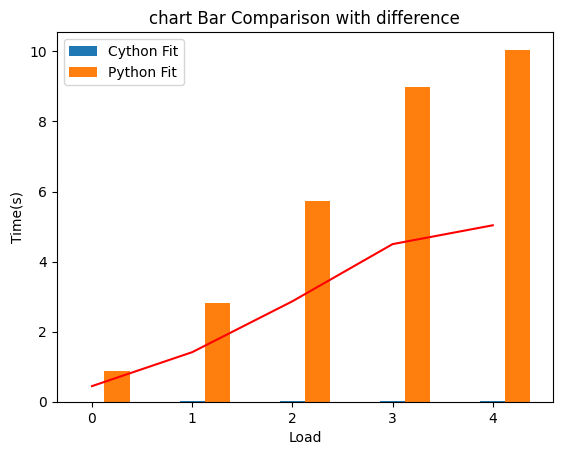

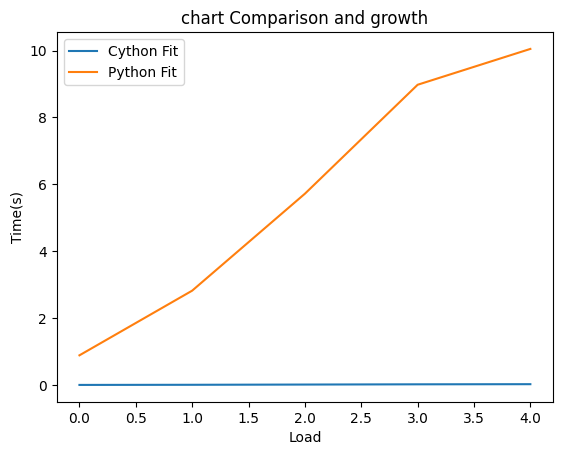

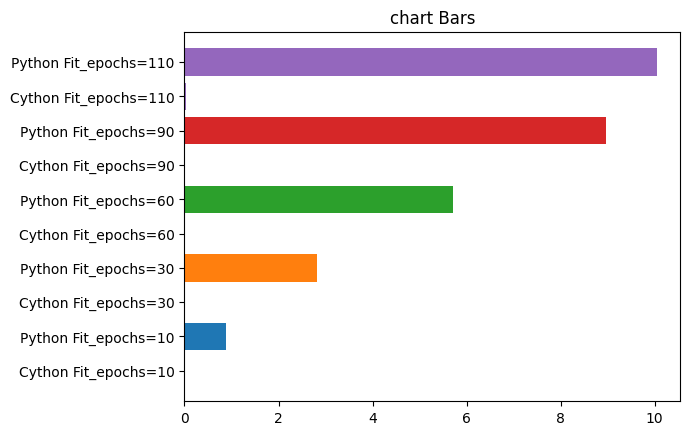

In [228]:
Tester.plot("result1.7e+09.json")

In [77]:
def test():
    ...

In [103]:
inspect.getmodule(NN.fit)

<module '__main__'>

"<class '__main__.Tester'>"